# 1. **Importing Libraries**





To use functions i needed to import libraries that will help me do the project

In [ ]:
# Importing the whole library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler

# 2. **Reading Data**

To start working with the data i have to read it first and create a data frame for it


In [ ]:
# Reading csv file function
dfread = pd.read_csv("/content/drive/MyDrive/Complaints.csv")
# Data frame function
df = pd.DataFrame(dfread)
df

,CASE_ID,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,OPEN_USER,CLOSE_DATE,...,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,RESOLUTION,RESOLUTION_DESCRIPTION,CASE_DESC,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,CAS-1060890-L3D6Q6,FTTH Home,CBU,FTTH Home,Resolved,Yes,F&I_BO,19.06.2022 06:07,DANA,21.06.2022 13:41,...,2.0,Actual Complaint,Phone,NaN,NaN,NaN,CBU / EBU - personal view,Technical,Internet,Technical complaint
1,CAS-388567-W4B9Q3,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,04.04.2022 14:11,TCRMService,05.04.2022 12:13,...,1.0,Not Actual Complaint,Phone,NaN,NaN,NaN,System Administrator,Commercial,Mobile,Commercial claim
2,CAS-1494939-L9F0X7,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,NaN,03.08.2022 03:20,MOUTAZ,03.08.2022 03:20,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
3,CAS-1059985-K3Y9F7,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,18.06.2022 20:38,MOATH,18.06.2022 20:38,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,NaN,Technical,Internet,Technical complaint
4,CAS-1239942-Y1S2F5,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,06.07.2022 01:22,IBRAHIM,06.07.2022 01:22,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10410,CAS-549162-Y2F4X6,OnLine Prepaid,CBU,Prepaid,Resolved,No,NaN,23.04.2022 09:31,ABRAR,23.04.2022 09:31,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,NaN,Commercial,Mobile,Commercial claim
10411,CAS-1094578-B7J7Z0,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,21.06.2022 19:40,AHMAD,21.06.2022 19:40,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
10412,CAS-470088-Q3Y2V7,FTTB Corporate,EBU,FTTB Corporate,Resolved,No,NaN,14.04.2022 14:36,YASMEEN,14.04.2022 14:36,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
10413,CAS-1249800-V2H6C7,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,NaN,07.07.2022 05:54,ALANOUD,07.07.2022 05:54,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint


# **3. Pre-Proccessing**

I have to clean and fill the data to be able use models on it.

In [ ]:
# Check how many duplicated data are
df.duplicated().sum()

0

In [ ]:
# Showing how many missing values are in each column
df.isnull().sum()

CASE_ID                       0
OFFER_NAME                 1293
CUSTOMER_TYPE                 0
CUSTOMER_GROUP             1348
CURRENT_STATUS                0
ESCALATION_FLAG               0
ESCALATED_GROUP            7055
OPEN_DATE                     0
OPEN_USER                   362
CLOSE_DATE                  119
CLOSE_GROUP                4890
CLOSE_USER                  516
AGE_BRACKET                 119
ACTUAL_COMPLAINT              0
CALLBACK_MECHANISM         7277
RESOLUTION                10336
RESOLUTION_DESCRIPTION    10376
CASE_DESC                  9243
OPEN_GR                    4561
COMPLAINT_TYPE                0
PRODUCT                       0
CASE                          0
dtype: int64

In [ ]:
# Show what the data is in the column 
df['COMPLAINT_TYPE'].value_counts()

Technical     7952
Commercial    2463
Name: COMPLAINT_TYPE, dtype: int64

In [ ]:
# Show what the data is in the column 
df['PRODUCT'].value_counts()

Internet    7297
Mobile      3118
Name: PRODUCT, dtype: int64

In [ ]:
# Show what the data is in the column 
df['CASE'].value_counts()

Technical complaint    7654
Commercial claim       2074
OJO-Internal            347
OM_CLAIM                318
OM Technical             22
Name: CASE, dtype: int64

In [ ]:
# Filling the missing data with the word "Unknown"
df['OFFER_NAME'] = df['OFFER_NAME'].fillna("Unknown")

In [ ]:
# Filling the missing data with the word "Unknown"
df['CUSTOMER_GROUP'] = df['CUSTOMER_GROUP'].fillna("Unknown")

In [ ]:
# Filling the missing data with the word "Unknown"
df['OPEN_USER'] = df['OPEN_USER'].fillna("Unknown")

In [ ]:
# Filling the missing data with the word "Unknown"
df['CLOSE_USER'] = df['CLOSE_USER'].fillna("Unknown")

In [ ]:
# Deleting a column
del df['RESOLUTION']

In [ ]:
# Deleting a column
del df['RESOLUTION_DESCRIPTION']

In [ ]:
# Deleting a column
del df['CASE_DESC']

In [ ]:
# Filling a column with the column mean
df['AGE_BRACKET'] = df['AGE_BRACKET'].fillna(df['AGE_BRACKET'].mean())
# Make the mean result as integer.
df['AGE_BRACKET'] = df['AGE_BRACKET'].fillna(0).astype(int)

In [ ]:
# Deleting a column
del df['CLOSE_DATE']

In [ ]:
# Deleting a column
del df['CALLBACK_MECHANISM'] 

In [ ]:
#Filling a column due to a condition
for x in range(len(df)):
   if df['ESCALATION_FLAG'].iloc[x] == 'Yes' and df['ESCALATED_GROUP'][x] == np.nan:
       df['CLOSE_GROUP'].iloc[x] = df['CLOSE_GROUP'].fillna(df['ESCALATED_GROUP']).iloc[x]

In [ ]:
# Deleting a column
del df['ESCALATED_GROUP']

In [ ]:
# Filling the missing data with the word "Unknown"
df["OPEN_GR"] = df["OPEN_GR"].fillna("Unknown")

In [ ]:
# Filling the missing data with the word "Unknown"
df["CLOSE_GROUP"] = df["CLOSE_GROUP"].fillna("Unknown")

In [ ]:
# Showing how many missing values are in each column
df.isnull().sum()

CASE_ID             0
OFFER_NAME          0
CUSTOMER_TYPE       0
CUSTOMER_GROUP      0
CURRENT_STATUS      0
ESCALATION_FLAG     0
OPEN_DATE           0
OPEN_USER           0
CLOSE_GROUP         0
CLOSE_USER          0
AGE_BRACKET         0
ACTUAL_COMPLAINT    0
OPEN_GR             0
COMPLAINT_TYPE      0
PRODUCT             0
CASE                0
dtype: int64

# **4. Feature Engineering and Dataset Splitting**

Computers understand numbers, so i have to make the data as numrical so it can be understood by the computer and use models

In [ ]:
# Function to change strings to numbers so the computer can understand
columns = df.select_dtypes(['object']).columns
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df[columns] = df[columns].apply(LabelEncoder().fit_transform)
df.head()

,CASE_ID,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,OPEN_DATE,OPEN_USER,CLOSE_GROUP,CLOSE_USER,AGE_BRACKET,ACTUAL_COMPLAINT,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,481,24,0,16,1,1,5650,55,19,57,2,0,10,1,0,4
1,5778,139,0,68,1,1,965,249,28,78,1,1,17,0,1,0
2,3263,9,0,71,1,0,867,166,10,165,1,2,2,1,0,4
3,474,24,0,16,1,0,5364,155,46,152,1,2,18,1,0,4
4,1462,24,0,16,1,0,1660,110,10,108,1,2,2,1,0,4


In [ ]:
# Determinning what x , y are

y1 = df['COMPLAINT_TYPE']
x1 = df.drop(['CASE_ID' ,'COMPLAINT_TYPE' , 'OPEN_DATE'], axis = 1)

In [ ]:
# Split the data to train values and test values
x1_train , x1_test , y1_train , y1_test = train_test_split(x1 , y1 , test_size = 0.2 , random_state = 0)

# **5. Modeling**

Using models to predict the target (I used KNN + DT + NB) 

**KNN**

In [ ]:
# Declaring a KNN model
KNN1 = KNeighborsClassifier(n_neighbors=5)

# Creating lists to add the results of the predictions
KNN1_Acc = []
KNN1_Rec = []
KNN1_Prc = []
KNN1_F1 = []

for i in range(30):
  KNN1.fit(x1_train,y1_train)
  y1knn_pred = KNN1.predict(x1_test)

  Acc = accuracy_score(y1_test , y1knn_pred)
  KNN1_Acc.append(Acc)

  Rec = recall_score(y1_test , y1knn_pred)
  KNN1_Rec.append(Rec)

  Prc = precision_score(y1_test , y1knn_pred)
  KNN1_Prc.append(Prc)

  F1 = f1_score(y1_test , y1knn_pred)
  KNN1_F1.append(F1)
A1 = sum(KNN1_Acc)/len(KNN1_Acc)
P1 = sum(KNN1_Prc)/len(KNN1_Prc)
R1 = sum(KNN1_Rec)/len(KNN1_Rec)
F1 = sum(KNN1_F1)/len(KNN1_F1)
print("Accuracy:  " , A1)
print("Precision: " , P1)
print("Recall:    " , R1)
print("F1_score:  " , F1)

Accuracy:   0.9025444071051363
Precision:  0.9288389513108618
Recall:     0.9435637285986048
F1_score:   0.9361434413337523


**DT**

In [ ]:
# Declaring a DT model
DT1 = DecisionTreeClassifier()

# Creating lists to add the results of the predictions
DT1_Acc = []
DT1_Rec = []
DT1_Prc = []
DT1_F1 = []

for i in range(30):
  DT1.fit(x1_train,y1_train)
  y1dt_pred = DT1.predict(x1_test)

  Acc = accuracy_score(y1_test , y1dt_pred)
  DT1_Acc.append(Acc)

  Rec = recall_score(y1_test , y1dt_pred)
  DT1_Rec.append(Rec)

  Prc = precision_score(y1_test , y1dt_pred)
  DT1_Prc.append(Prc)

  F1 = f1_score(y1_test , y1dt_pred)
  DT1_F1.append(F1)

A2 = sum(DT1_Acc)/len(DT1_Acc)
P2 = sum(DT1_Prc)/len(DT1_Prc) 
R2 = sum(DT1_Rec)/len(DT1_Rec) 
F2 = sum(DT1_F1)/len(DT1_F1) 
print("Accuracy:  " , A2)
print("Precision: " , P2)
print("Recall:    " , R2)
print("F1_score:  " , F2)

Accuracy:   0.9913906224995997
Precision:  0.9948581165388293
Recall:     0.993764531811456
F1_score:   0.9943106901145078


**NB**

In [ ]:
# Declaring a NB model
NB1 = GaussianNB()

# Creating lists to add the results of the predictions
NB1_Acc = []
NB1_Rec = []
NB1_Prc = []
NB1_F1 = []

for i in range(30):
  NB1.fit(x1_train,y1_train)
  y1nb_pred = NB1.predict(x1_test)

  Acc = accuracy_score(y1_test , y1nb_pred)
  NB1_Acc.append(Acc)

  Rec = recall_score(y1_test , y1nb_pred)
  NB1_Rec.append(Rec)

  Prc = precision_score(y1_test , y1nb_pred)
  NB1_Prc.append(Prc)

  F1 = f1_score(y1_test , y1nb_pred)
  NB1_F1.append(F1)
A3 = sum(NB1_Acc)/len(NB1_Acc) 
P3 = sum(NB1_Prc)/len(NB1_Prc) 
R3 = sum(NB1_Rec)/len(NB1_Rec) 
F3 = sum(NB1_F1)/len(NB1_F1)
print("Accuracy:  " , A3)
print("Precision: " , P3)
print("Recall:    " , R3)
print("F1_score:  " , F3)

Accuracy:   0.9836773883821409
Precision:  0.9929712460063901
Recall:     0.9854153455928979
F1_score:   0.9891788669637168


# **6. Visulazation**

**Bar Chart**

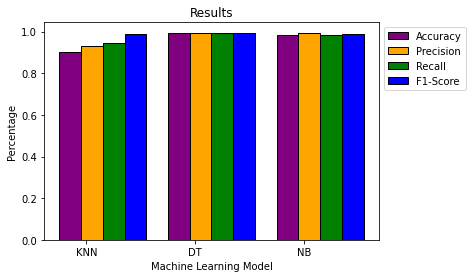

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = ['KNN','DT','NB']
yA = [A1 , A2 , A3]
yP = [P1 , P2 , P3]
yR = [R1 , R2 , R3]
xF = [F1 , F2 , F3]
X_axis = np.arange(len(x))
  
plt.bar(X_axis + 0.15 , yA , color = 'purple' , width = 0.20 , edgecolor = 'black' , label = 'Accuracy')
plt.bar(X_axis + 0.35 , yP , color = 'orange' , width = 0.20 , edgecolor = 'black' , label = 'Precision')
plt.bar(X_axis + 0.55 , yR , color = 'green'  , width = 0.20 , edgecolor = 'black' , label = 'Recall')
plt.bar(X_axis + 0.75 , xF , color = 'blue'   , width = 0.20 , edgecolor = 'black' , label = 'F1-Score')
plt.xticks(X_axis + 0.30, x)
plt.legend(bbox_to_anchor=(1 , 1))

plt.xlabel("Machine Learning Model")
plt.ylabel("Percentage")
plt.title("Results")
plt.show()

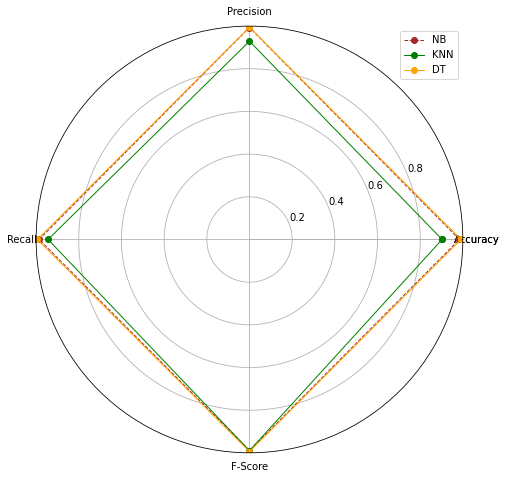

In [ ]:
Measurement = ['Accuracy' , 'Precision' , 'Recall' , 'F-Score']
KNN = [A1 , P1 , R1 , F1]
DT  = [A2 , P2 , R2 , F2]
NB  = [A3 , P3 , R3 , F3]

angles = np.linspace(0 , 2 * np.pi , len(Measurement) , endpoint = False)
angles = np.concatenate((angles,[angles[0]]))

Measurement.append(Measurement[0])
KNN.append(KNN[0])
DT.append(DT[0])
NB.append(NB[0])

fig = plt.figure(figsize = (7 , 7))
ax=fig.add_subplot(111 , polar = True)

# NB Visualization
ax.plot(angles , NB , 'o--' , color = 'brown', linewidth = 1 , label = 'NB')

# KNN Visualization 
ax.plot(angles , KNN , 'o-' , color = 'g', linewidth = 1 , label = 'KNN')

# DT Visualization
ax.plot(angles , DT ,  'o-' , color = 'orange' , linewidth = 1 , label = 'DT')

ax.set_thetagrids(angles * 180 / np.pi, Measurement)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

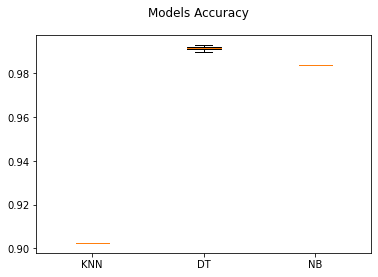

In [ ]:
AccK = np.array(KNN1_Acc)
AccD = np.array(DT1_Acc)
AccN = np.array(NB1_Acc)

dict = {'KNN' : AccK , 'DT' : AccD , 'NB' : AccN}
fig, ax = plt.subplots()

fig.suptitle('Models Accuracy')
ax.boxplot(dict.values())
ax.set_xticklabels(dict.keys())
plt.show()

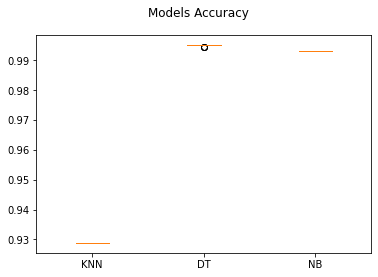

In [ ]:
PrcK = np.array(KNN1_Prc)
PrcD = np.array(DT1_Prc)
PrcN = np.array(NB1_Prc)

dict = {'KNN' : PrcK , 'DT' : PrcD , 'NB' : PrcN}
fig, ax = plt.subplots()

fig.suptitle('Models Accuracy')
ax.boxplot(dict.values())
ax.set_xticklabels(dict.keys())
plt.show()

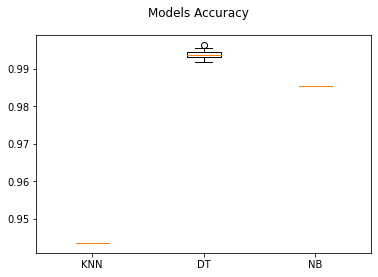

In [ ]:
RecK = np.array(KNN1_Rec)
RecD = np.array(DT1_Rec)
RecN = np.array(NB1_Rec)

dict = {'KNN' : RecK , 'DT' : RecD , 'NB' : RecN}
fig, ax = plt.subplots()

fig.suptitle('Models Accuracy')
ax.boxplot(dict.values())
ax.set_xticklabels(dict.keys())
plt.show()

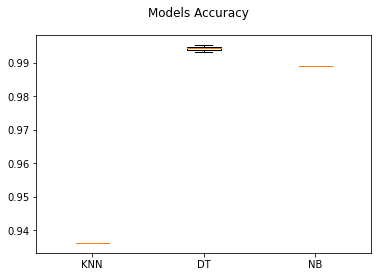

In [ ]:
FK = np.array(KNN1_F1)
FD = np.array(DT1_F1)
FN = np.array(NB1_F1)

dict = {'KNN' : FK , 'DT' : FD , 'NB' : FN}
fig, ax = plt.subplots()

fig.suptitle('Models Accuracy')
ax.boxplot(dict.values())
ax.set_xticklabels(dict.keys())
plt.show()